In [1]:
#Import everything
import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import fcsparser

import os
import sys
import math
import numpy as np
import numpy.linalg
import pandas as pd

import ternary
from scipy.stats import multinomial

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import index_haps as idh
import index_flow as idf

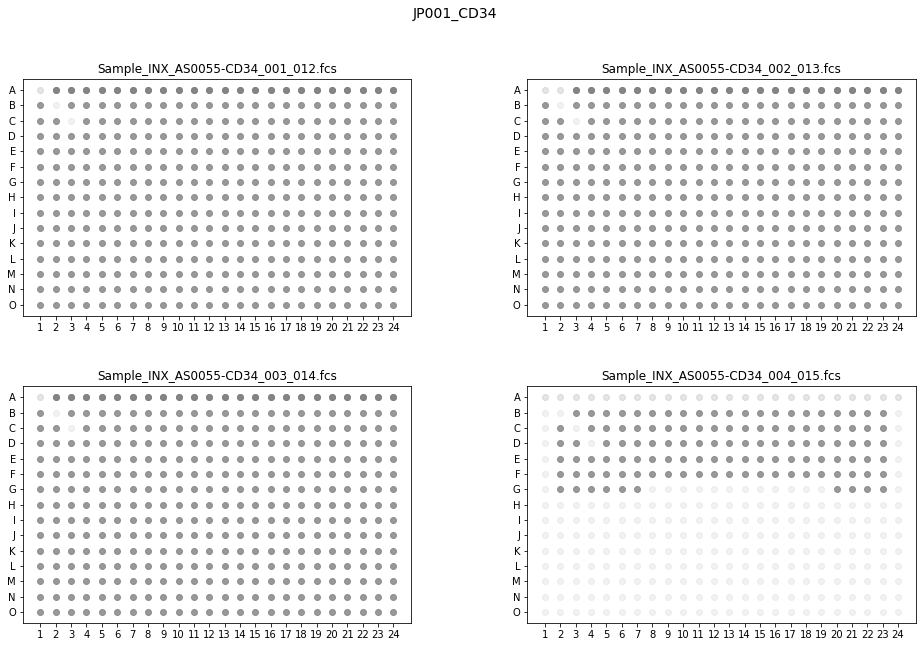

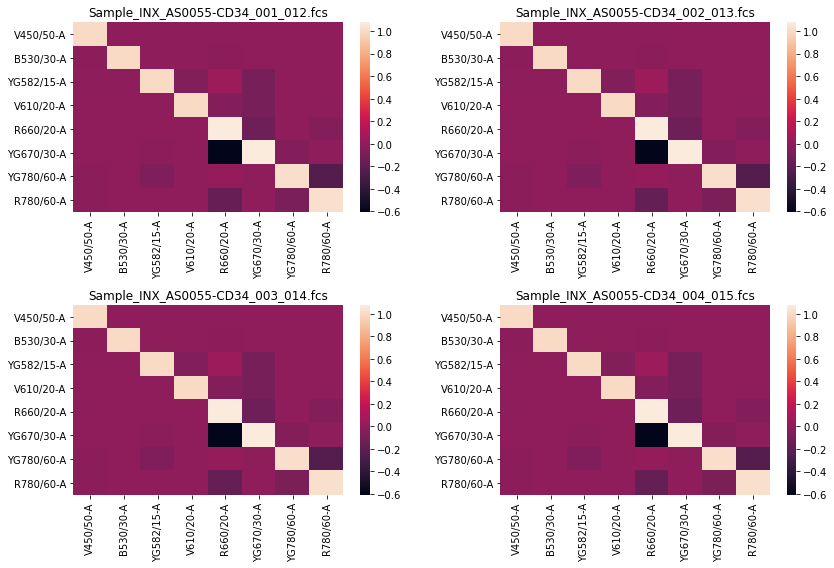

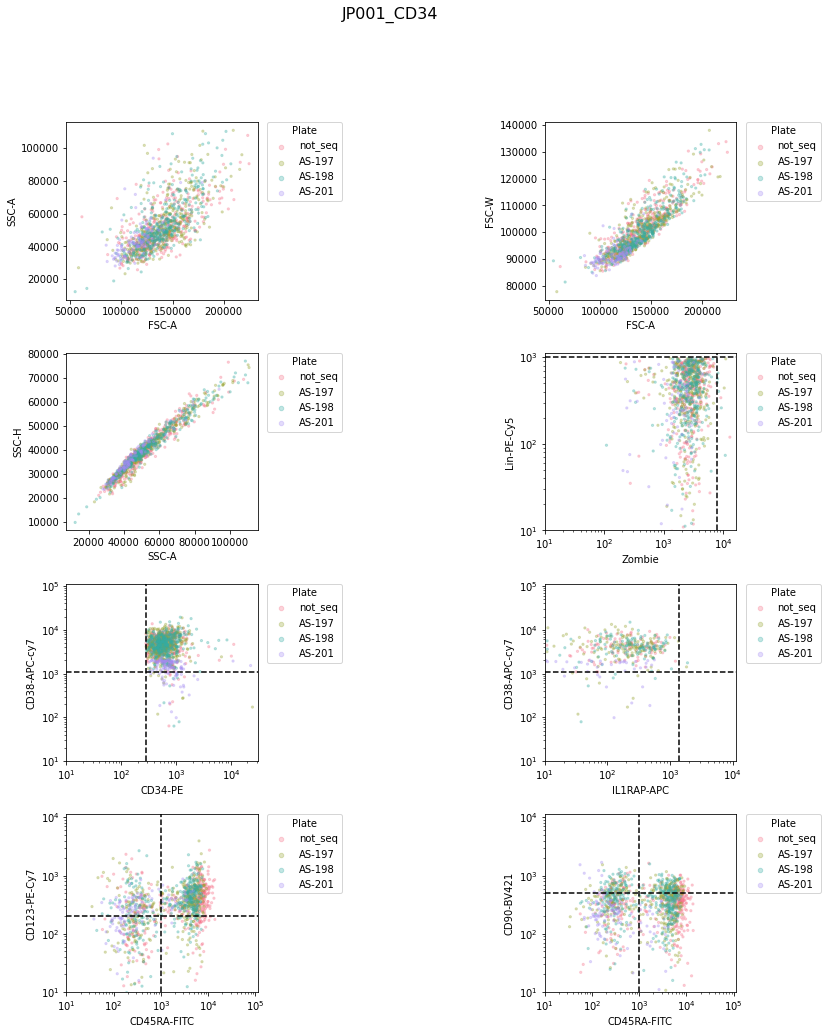

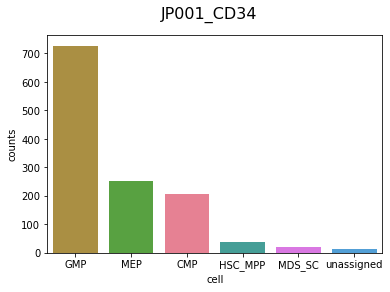

In [2]:
#JP001 CD34 parameters

directory = '../Data/JP001_BM/Indexed/'

#Make plate key - note one plate split over 2 index files
plate_key = {'Sample_INX_AS0055-CD34_001_012.fcs': 'not_seq',
             'Sample_INX_AS0055-CD34_002_013.fcs': 'AS-197',
             'Sample_INX_AS0055-CD34_003_014.fcs': 'AS-198',
             'Sample_INX_AS0055-CD34_004_015.fcs': 'AS-201'
            }

channel_key = {'YG582/15-A': 'CD34-PE', 
               'YG670/30-A': 'Lin-PE-Cy5', 
               'YG780/60-A': 'CD123-PE-Cy7', 
               'V450/50-A': 'CD90-BV421', 
               'V610/20-A': 'Zombie', 
               'B530/30-A': 'CD45RA-FITC', 
               'R660/20-A': 'IL1RAP-APC', 
               'R780/60-A': 'CD38-APC-cy7'
}

logs = ['Lin-PE-Cy5', 'CD34-PE','CD38-APC-cy7', 'CD45RA-FITC','CD123-PE-Cy7','Zombie', 'IL1RAP-APC', 'CD90-BV421' ]

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'Lin-PE-Cy5'], 
    ['CD34-PE', 'CD38-APC-cy7'],
    ['IL1RAP-APC', 'CD38-APC-cy7'],
    ['CD45RA-FITC', 'CD123-PE-Cy7'],
    ['CD45RA-FITC', 'CD90-BV421']
]
 
gates = {
    'Lin-PE-Cy5': 1000,
    'CD34-PE': 280 ,
    'CD38-APC-cy7': 1100 ,  #Originally 2500, have adjusted to 1100 as per AS calculation for lowest 10%. 1300 ~15%. This is compatible with FlowJo analysis on total MNC
    'CD45RA-FITC': 1000 ,
    'CD123-PE-Cy7': 200,
    'Zombie': 8000,
    'IL1RAP-APC': 1400,  #set from FlowJo looking at FMOs
    'CD90-BV421': 500,
}



label = 'JP001_CD34'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = True)
idf.flowplot_byplate(source, plot_list, logs, gates, label)
CD34assigned = idf.MDS_BM_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(CD34assigned, plot_list, logs, gates,  label, plot = False, save = False)

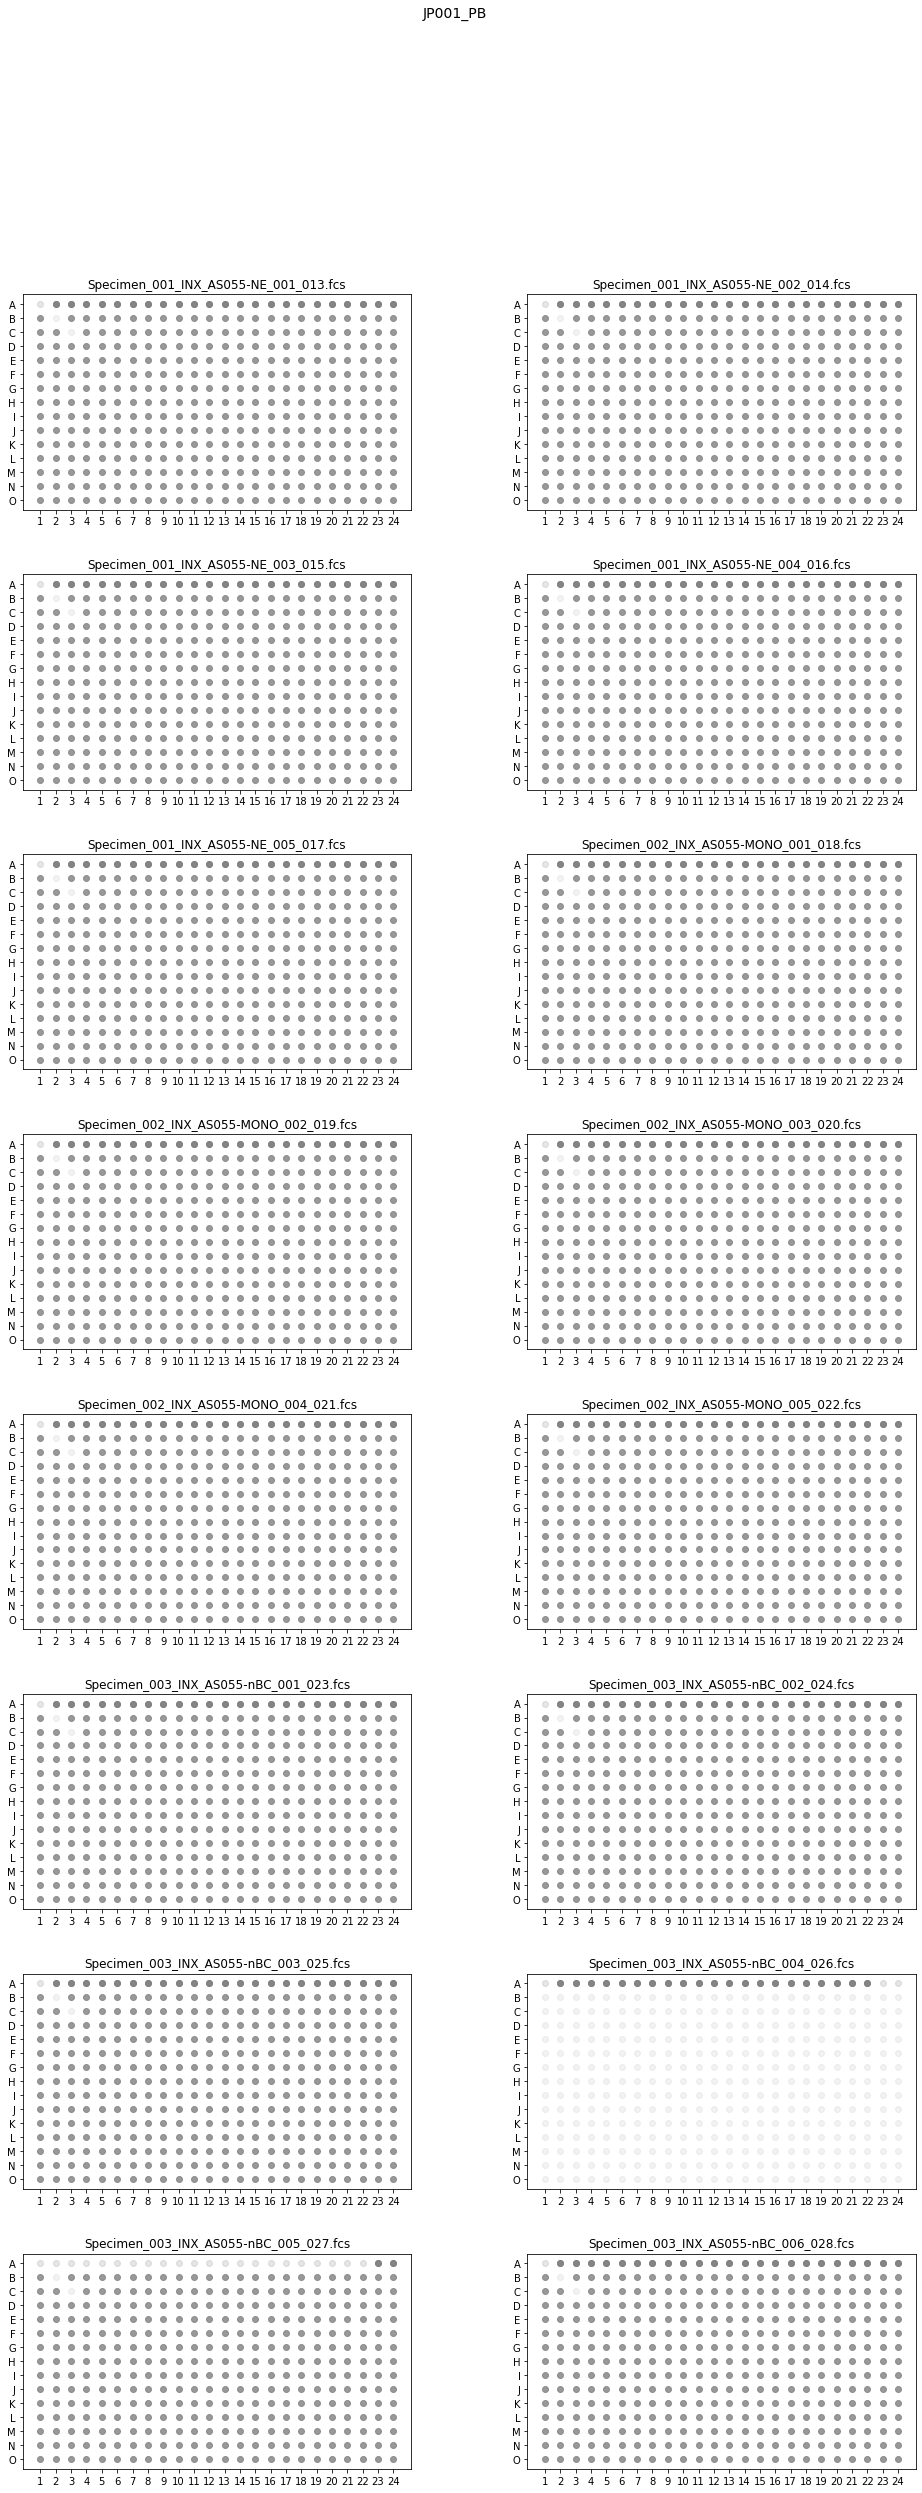

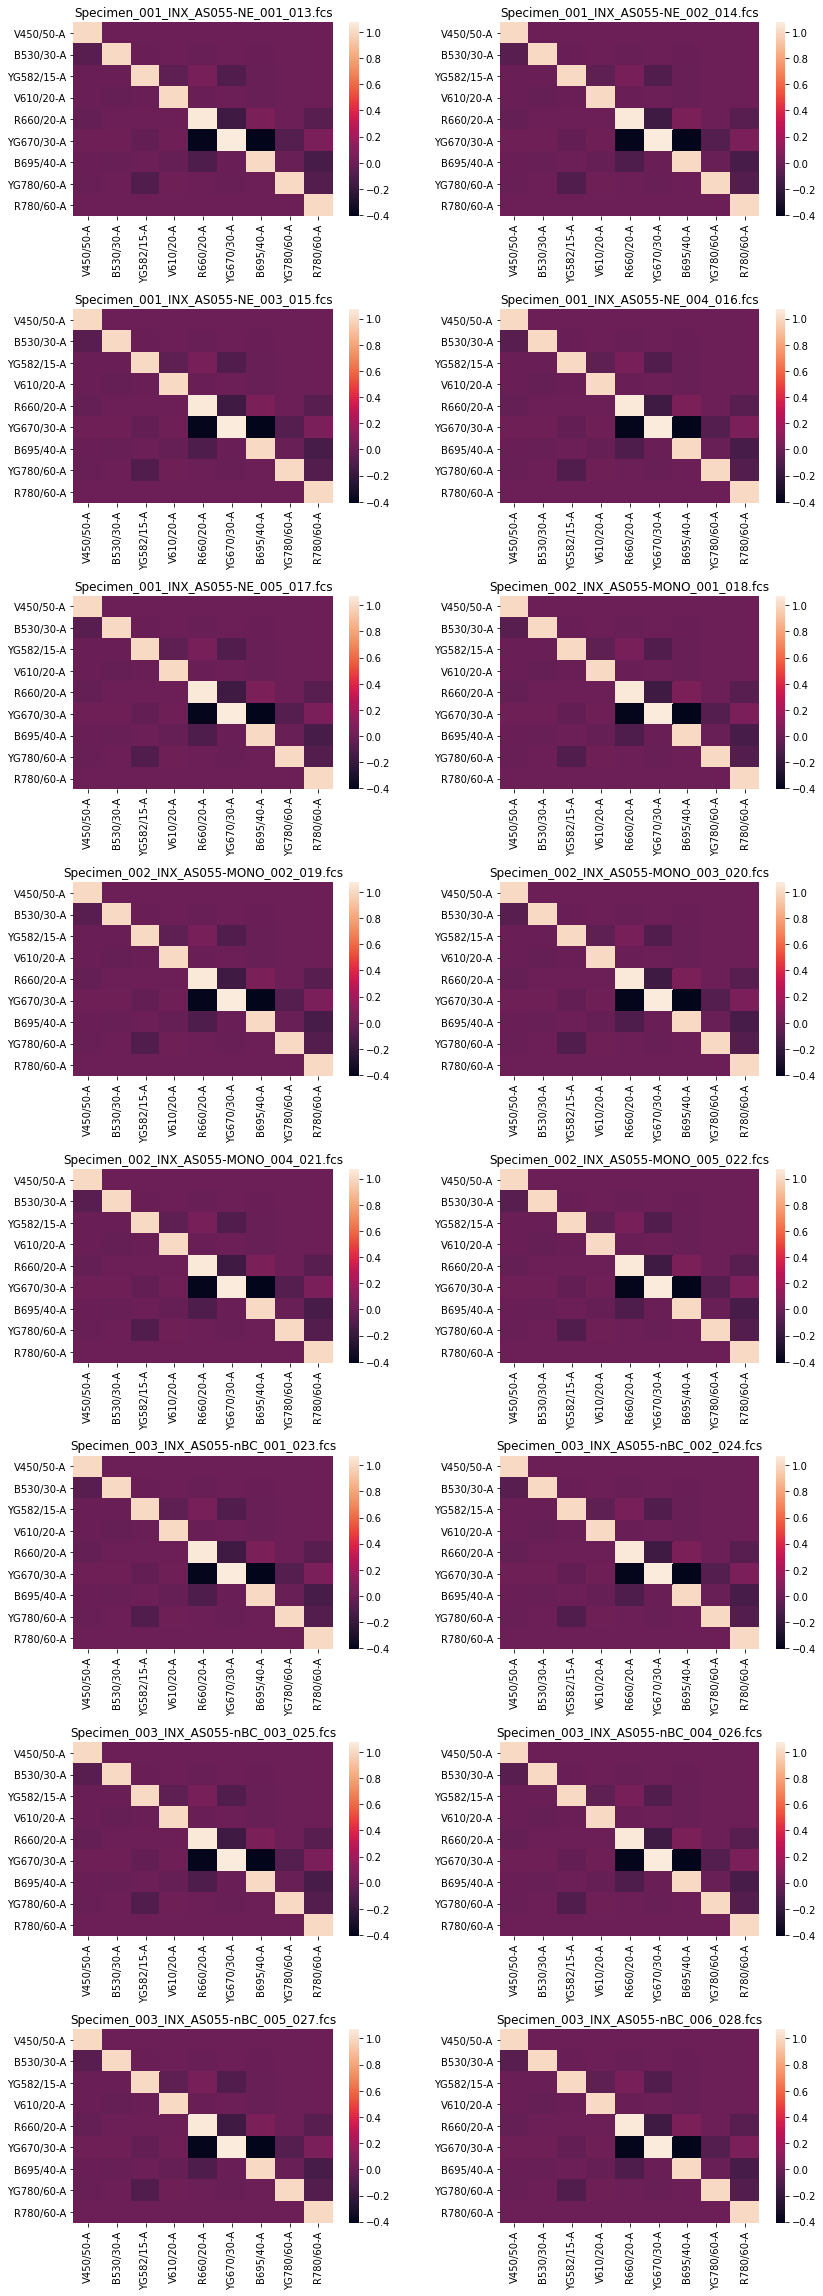

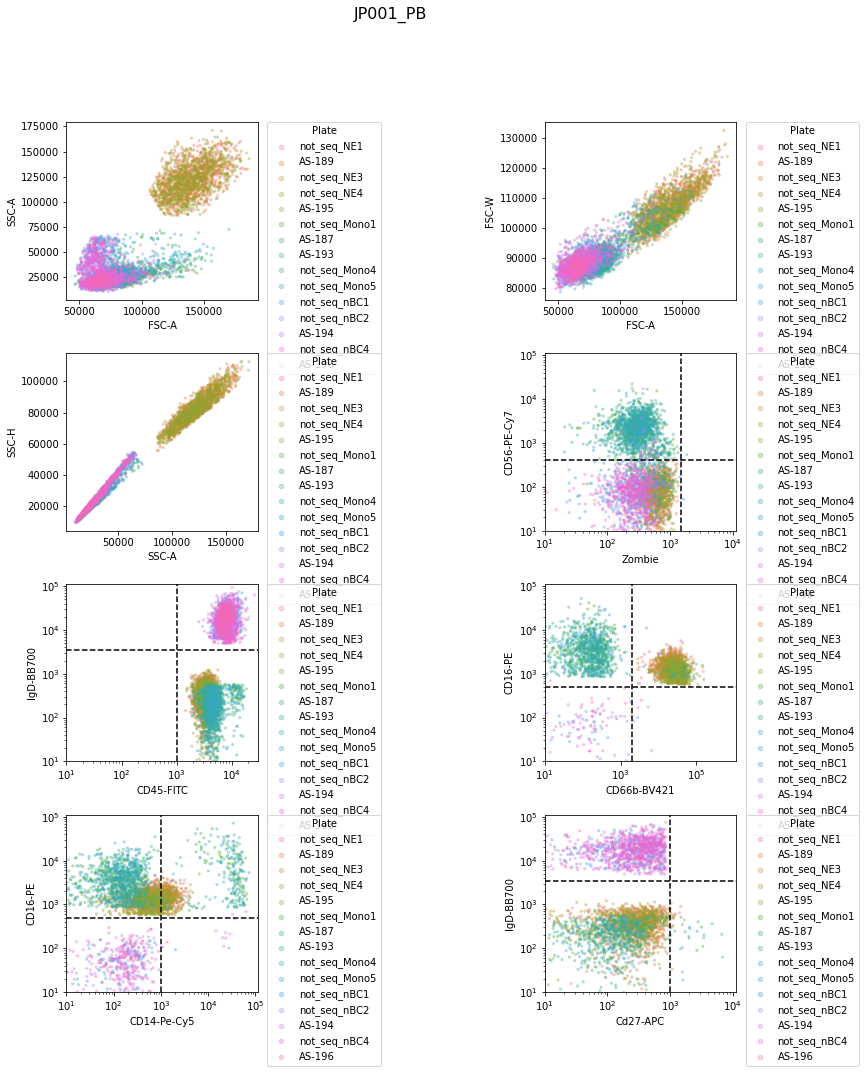

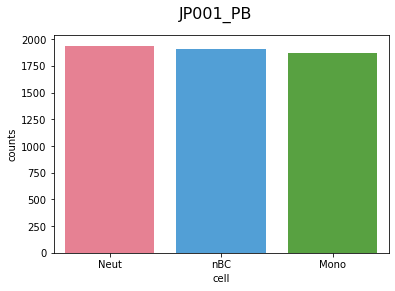

In [3]:
#JP001 PB parameters

directory = '../Data/JP001_PB/Indexed/'

#Make plate key - note one plate split over 2 index files
files = []
for filename in os.listdir(directory):
    files.append(filename)


plates = ['not_seq_NE1','AS-189','not_seq_NE3','not_seq_NE4','AS-195','not_seq_Mono1','AS-187','AS-193','not_seq_Mono4','not_seq_Mono5','not_seq_nBC1','not_seq_nBC2','AS-194','not_seq_nBC4a','not_seq_nBC4','AS-196']

plate_key = dict(zip(files, plates))

channel_key = {
    'YG582/15-A': 'CD16-PE', 
    'YG670/30-A': 'CD14-Pe-Cy5', 
    'YG780/60-A': 'CD56-PE-Cy7', 
    'V450/50-A': 'CD66b-BV421', 
    'V610/20-A': 'Zombie', 
    'B530/30-A': 'CD45-FITC', 
    'B695/40-A': 'IgD-BB700', 
    'R660/20-A': 'Cd27-APC'
}

logs = ['CD16-PE', 'CD14-Pe-Cy5', 'CD56-PE-Cy7', 'CD66b-BV421', 'Zombie', 'CD45-FITC', 'Cd27-APC', 'R780/60-A', 'IgD-BB700']

plot_list = [
    ['FSC-A', 'SSC-A'],
    ['FSC-A', 'FSC-W'],
    ['SSC-A', 'SSC-H'],
    ['Zombie', 'CD56-PE-Cy7'], 
    ['CD45-FITC', 'IgD-BB700'],
    ['CD66b-BV421', 'CD16-PE'],
    ['CD14-Pe-Cy5', 'CD16-PE'],
    ['Cd27-APC', 'IgD-BB700']
]

gates = {
    'CD16-PE': 500,
    'CD14-Pe-Cy5': 1000 ,
    'CD56-PE-Cy7': 400 ,
    'CD66b-BV421': 2000 ,
    'Zombie': 1500,
    'CD45-FITC': 1000,
    'Cd27-APC': 1000,
    'IgD-BB700': 3500,
    'R780/60-A':1000
}

label = 'JP001_PB'
idf.plate_qc(directory, label)
source = idf.get_comp_data(directory, plate_key, channel_key, plot = True)

#Need to rename placeholder plate not_seq_nBC4a, and reassign Plate_Well column
source['Plate'] = source['Plate'].replace({'not_seq_nBC4a':'not_seq_nBC4'})
source['Plate_Well'] = source['Plate'].astype(str) + '_' + source['Well'].astype(str)
idf.flowplot_byplate(source, plot_list, logs, gates,label)
PBassigned = idf.PB_celltype_assign(source, gates, label, save = False)
idf.flowplot_bycelltype(PBassigned, plot_list, logs, gates,  label, plot = False, save = False)

In [4]:
#Now combine everything into a single df that contains the celltype and flow data for each well
print('Number of CD34 wells (expect 1259) = ', len(CD34assigned))
print('Number of PB wells (expect 5715) = ',len(PBassigned))
JP001_allcells_assigned = CD34assigned.append(PBassigned, ignore_index=True)
print('Total number of wells = ', len(JP001_allcells_assigned))

Number of CD34 wells (expect 1259) =  1259
Number of PB wells (expect 5715) =  5715
Total number of wells =  6974


JP001_3
Cells with 50 reads for 3 genes =  1234


C:\Users\z3283497\python\Annatina\MDS_amplicons\Code\index_haps.py:445: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(h_pad = 1)


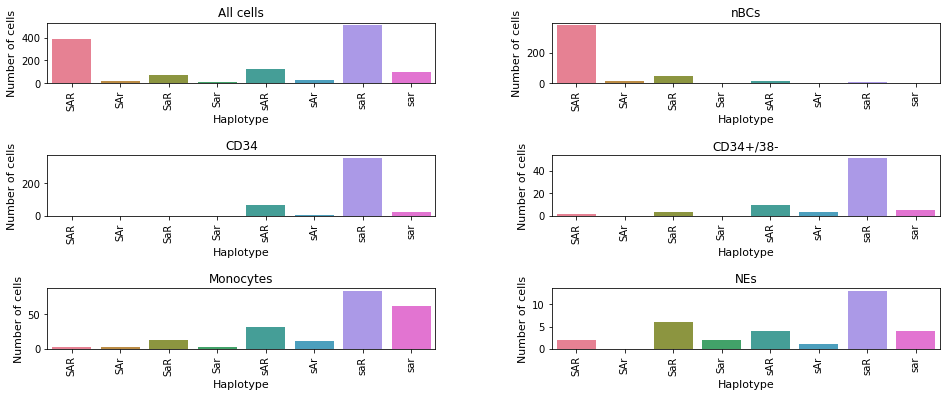

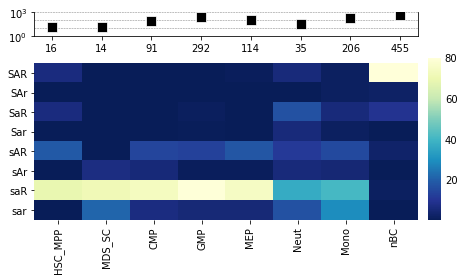

In [5]:
#And assign haplotypes
datafile = '../Data/Amp_data/allele_counts_anon.tsv'
metadata = '../Data/Amp_data/Amplicon_metadata_fixed_anon.xlsx'
pt_id = 'JP001'
haps = 3
reads = 50
cutoff = 0.1
JP001_plate = idh.data_retrieval(datafile, metadata, pt_id)
JP001_haps = idh.call_haps(JP001_plate, metadata, pt_id, haps, reads, cutoff) #hap number, read cut, proprtion mutated
JP001_haps_indexed = pd.merge(JP001_haps, JP001_allcells_assigned, on = 'Plate_Well')
idh.plot_hap_dist_sort_type(JP001_haps_indexed, pt_id, haps, reads, cutoff, save = True)
cell_number = idh.plot_index_heatmap_2(JP001_haps_indexed, pt_id, haps, reads, cutoff, save = True)

In [6]:
#Drop nBC from following plots (very few mutated cells)
cell_number2 = cell_number.copy()
if 'nBC' in cell_number2.columns:
    cell_number2.drop(columns = 'nBC', inplace = True)

In [7]:
#How many WT cells for each type
k = cell_number2.loc[['SAR', 'sAR', 'saR', 'sar']]
#How many mutated cells for each type
j = cell_number2.loc[['sAR', 'saR', 'sar']]
j.sum(axis = 0)

celltype
HSC_MPP     14
MDS_SC      13
CMP         86
GMP        286
MEP        112
Neut        23
Mono       175
dtype: int64

In [8]:
#What is the proportion of mutated cells
y = cell_number2.loc[['sAR', 'saR', 'sar']]
y = y*100/y.sum(axis = 0)
ct = y.index.get_level_values(0)
y

celltype,HSC_MPP,MDS_SC,CMP,GMP,MEP,Neut,Mono
Haplotype,,,,,,,
sAR,21.428571,0.000000,15.116279,13.636364,18.750000,17.391304,17.714286
saR,78.571429,76.923077,77.906977,81.118881,75.892857,56.521739,48.000000
sar,0.000000,23.076923,6.976744,5.244755,5.357143,26.086957,34.285714


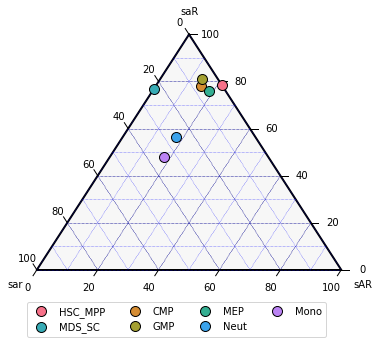

In [9]:
idh.tern_plot(y, pt_id, reads, cutoff)

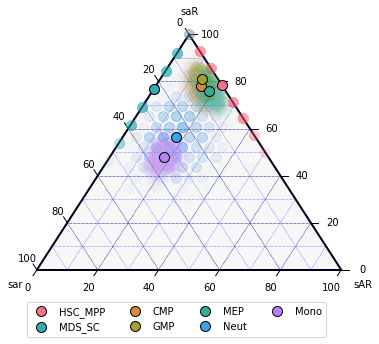

In [10]:
idh.tern_plot_cloud(y, j, pt_id, reads, cutoff)

<ipython-input-11-14703872391d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JP001small3['mut_no'] = JP001small3['Haplotype'].replace(mut_no)


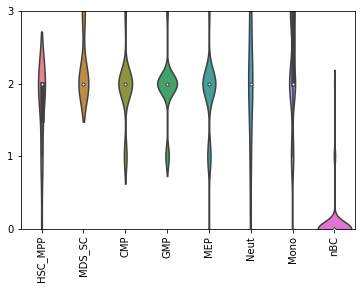

In [11]:
#Graphs to look at number of mutations per cell
JP001small = JP001_haps_indexed.loc[JP001_haps_indexed['Haplotype'].isin(['SAR', 'sAR', 'saR', 'sar'])]
mut_no = dict(zip(['SAR', 'sAR', 'saR', 'sar'], [0,1,2,3])) 
JP001small2 = JP001small.loc[JP001small['celltype'].isin(['HSC_MPP','CMP',  'GMP','MEP', 'MDS_SC',  'Neut', 'Mono','nBC'])]
JP001small3 = JP001small2[['Haplotype', 'celltype']]
JP001small3['mut_no'] = JP001small3['Haplotype'].replace(mut_no)

fig, ax = plt.subplots()
colors = sns.color_palette('husl', n_colors = 8)
sns.violinplot(x = 'celltype', y = 'mut_no', ax = ax, data = JP001small3, palette = colors, order = ['HSC_MPP','MDS_SC','CMP',  'GMP', 'MEP',   'Neut', 'Mono','nBC'])
ax.set_ylim(0, 3)
ax.set_yticks([0,1,2,3])
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x', labelrotation = 90)
fig.savefig('../Results/JP001_no_muts_violin.png',bbox_inches='tight',dpi=300)

In [12]:
#Piecharts for figure 2
#Cell counts permitted haplotypes
cc = cell_number.loc[['SAR', 'sAR', 'saR', 'sar']]
cc

celltype,HSC_MPP,MDS_SC,CMP,GMP,MEP,Neut,Mono,nBC
Haplotype,,,,,,,,
SAR,1,0,0,0,1,2,3,380
sAR,3,0,13,39,21,4,31,14
saR,11,10,67,232,85,13,84,7
sar,0,3,6,15,6,6,60,0


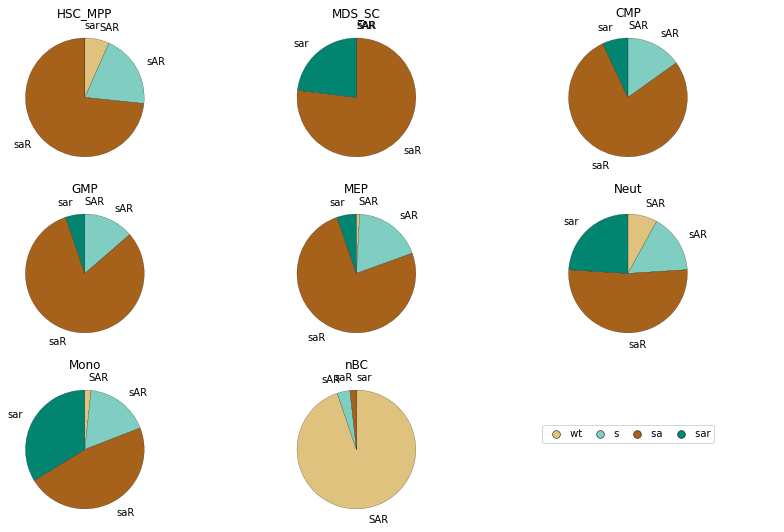

In [13]:
#Create proxy artists for legend
f,a = plt.subplots()
colors = ['#dfc27d', '#80cdc1', '#a6611a', '#018571']
lgdlabels = [' wt', ' s', ' sa', ' sar']
lgdhandles = []
for i, lab in enumerate(lgdlabels):
    line = a.scatter([0], [0], label=lab, color=colors[i], s = 60, edgecolor = 'black', linewidth = 0.5) 
    lgdhandles.append(line)
plt.close(f)

#Plot data
fig, ax = plt.subplots(3, 3, figsize = (12, 7.5))
ax = ax.flatten()

for count, ct in enumerate(cc.columns):
    labels = cc.index.to_list()
    sizes = cc[ct].to_list()
    wedgeprops={'edgecolor':'black','linewidth': 0.2,  'antialiased': True}
    ax[count].pie(sizes, labels = labels, colors = colors, counterclock=False, startangle = 90, wedgeprops = wedgeprops, labeldistance = 1.2)
    ax[count].set_title(ct)

ax[8].set_axis_off()    
ax[8].legend(handles = lgdhandles, labels = lgdlabels, loc = 'upper center',bbox_to_anchor = [0.5,0.7], ncol = 4, columnspacing = 0.8, handletextpad=0.1, markerscale = 1)

fig.tight_layout() 
fig.savefig(f'../Results/{pt_id}_piecharts.svg',bbox_inches='tight', dpi = 600)
fig.savefig(f'../Results/{pt_id}_piecharts.png',bbox_inches='tight', dpi = 600)
